In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
# load train data
df_train = pd.read_csv("../input/train.csv")

In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df_train.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
712,713,120,RL,40.0,4671,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,189000
97,98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750
1414,1415,50,RL,64.0,13053,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,207000
640,641,120,RL,62.0,12677,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,274000
985,986,190,RL,68.0,10880,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,ConLD,Normal,125000
477,478,60,RL,105.0,13693,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,380000
999,1000,20,RL,64.0,6762,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,206000
652,653,60,RL,70.0,8750,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,191000
542,543,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,213250
940,941,90,RL,55.0,12640,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,150900


インデックスから特徴量が必要か必要でないか判断
どうやって削ってるのかは正直よくわからんわ。飛ばす。


In [9]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

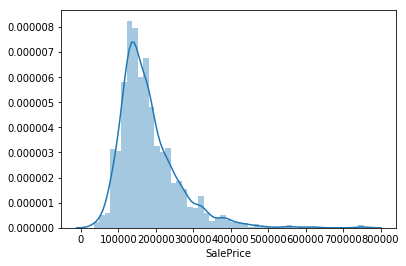

In [10]:
sns.distplot(df_train['SalePrice'])

In [11]:
print("Skewness: %f" % df_train['SalePrice'].skew())  # 歪度
print("Kurtosiss: %f" % df_train['SalePrice'].kurt())  # 尖度

Skewness: 1.882876
Kurtosiss: 6.536282


OverallQual, YearBuilt, TotalBsmtSF, GrLivArea
を特徴量として着目するそうな

In [13]:
var = ["OverallQual", "YearBuilt", "TotalBsmtSF", "GrLivArea"]

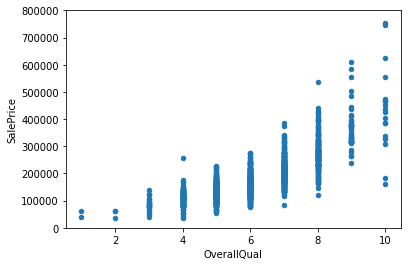

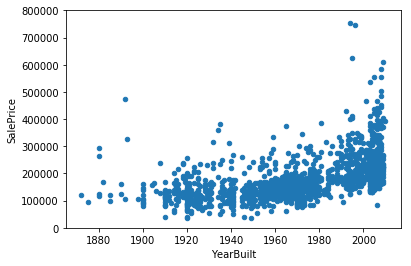

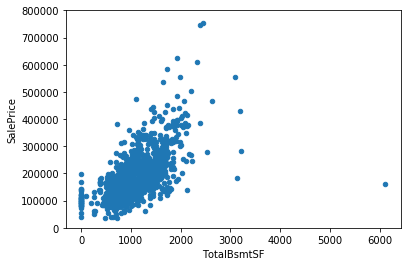

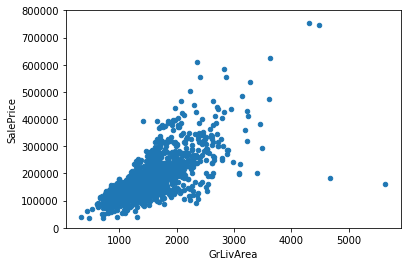

In [17]:
for _ in var:
    data = pd.concat([df_train['SalePrice'], df_train[_]], axis=1)
    data.plot.scatter(x=_, y='SalePrice', ylim=(0, 800000))
    # pandas.plotはpandasに元からあるapi。
    # x, yでラベル名でx, y軸のカラムを指定できる

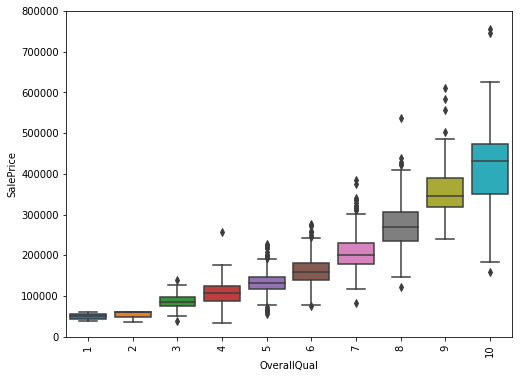

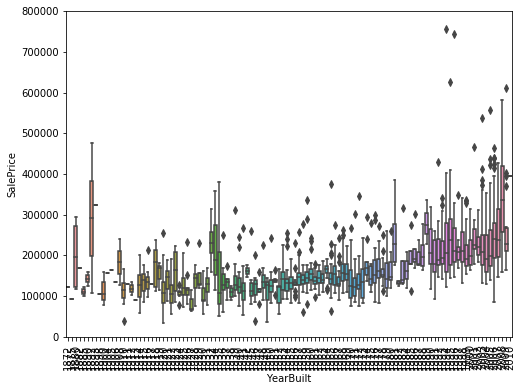

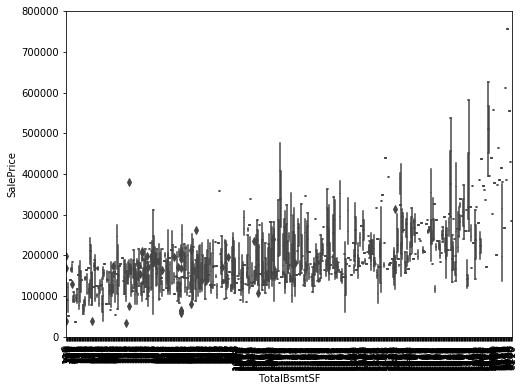

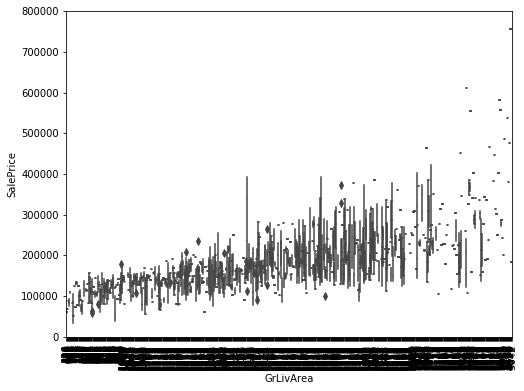

In [19]:
for _ in var:
    data = pd.concat([df_train['SalePrice'], df_train[_]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    # figureインスタンスが図を書くキャンバスとして、
    # axesインスタンスが、実際に書く図。
    # subplotsは、figureインスタンスとaxesインスタンス両方を出力する。
    ax = sns.boxplot(x=_, y='SalePrice', data=data)
    # boxplotの戻り値はプロットを描画したmatplotlibのaxesクラス
    ax.axis(ylim=0, ymax=800000)
    # axes.axisは、軸の設定を行う
    plt.xticks(rotation=90)  # 一体どこにパラメータが格納されてんの？意味不
    

In [20]:
corrmat = df_train.corr()

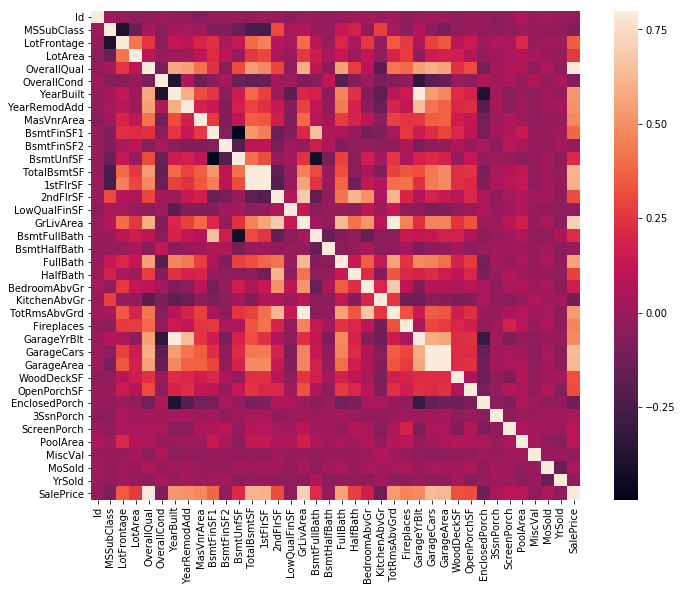

In [22]:
f, ax = plt.subplots(figsize=(12, 9))
ax = sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()